In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('fakedata.csv')
df.head()

,full name,address,country,job,company,balance,vehicle,birthday
0,Delbert Beer,700 Evelyn Wells,Mali,Principal Implementation Administrator,Antero Resources,"$4,168.79",NaN,1999-02-09
1,Terri Predovic,646 Wunsch Road,NaN,Legacy Response Designer,Meritage Homes,NaN,NaN,1998-07-10
2,April Wuckert,3058 Kacie Mountains,Saudi Arabia,Product Directives Executive,IAC/InterActiveCorp,"$3,735.60",Kia,1992-01-29
3,Tracy Bode,852 George Centers,Antarctica (the territory South of 60 deg S),Forward Markets Analyst,Spectra Energy,"$1,486.38",Lamborghini,1995-05-21
4,Keith Cremin,41961 Kuhic Route,Mauritania,District Applications Officer,Steelcase,"$4,019.85",Chrysler,1995-10-28


### Null values Visualize

<AxesSubplot: >

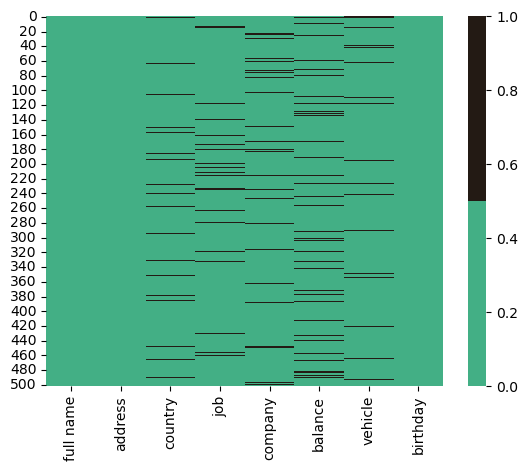

In [42]:
# Null values visualise

cols = df.columns 
colours = ['#43af85', '#231a14'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# we can also use 
sns.heatmap(df.isna()) 
sns.heatmap(df.isna().transpose()) 

created missing indicator for: country
created missing indicator for: job
created missing indicator for: company
created missing indicator for: balance
created missing indicator for: vehicle


<AxesSubplot: xlabel='index'>

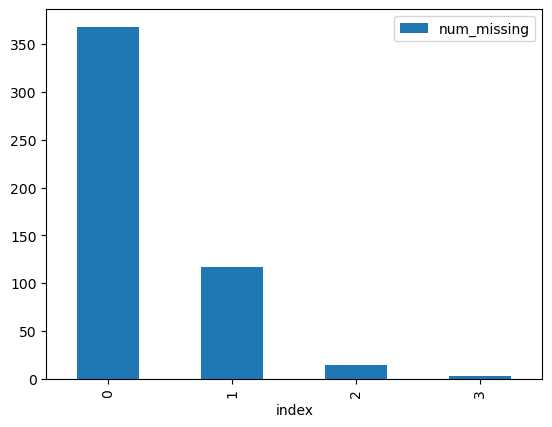

In [10]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

### Percentage of nan values in cols

In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

full name - 0%
address - 0%
country - 5%
job - 6%
company - 6%
balance - 10%
vehicle - 4%
birthday - 0%
country_ismissing - 0%
job_ismissing - 0%
company_ismissing - 0%
balance_ismissing - 0%
vehicle_ismissing - 0%
num_missing - 0%


In [14]:
# Check numeric col

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['num_missing']


In [15]:
# Check non-numeric col

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['full name' 'address' 'country' 'job' 'company' 'balance' 'vehicle'
 'birthday' 'country_ismissing' 'job_ismissing' 'company_ismissing'
 'balance_ismissing' 'vehicle_ismissing']


#### So as we can see, there are no numeric columns in our dataset so far. 
#### Although here balance column is numeric but for some reason its datatype is string/object.
Now we have to make it integer and fill nan values.

In [16]:
df = pd.read_csv('fakedata.csv')
df.columns

Index(['full name', 'address', 'country', 'job', 'company', 'balance',
       'vehicle', 'birthday'],
      dtype='object')

In [17]:
# We have to get rid of $ sign

import re
df['balance'] = df['balance'].replace(r'\$', r'', regex=True)
df.head(1)

,full name,address,country,job,company,balance,vehicle,birthday
0,Delbert Beer,700 Evelyn Wells,Mali,Principal Implementation Administrator,Antero Resources,"4,168.79",NaN,1999-02-09


In [18]:
# Now we need to delete the comma

df['balance'] = df['balance'].str.replace(',','')
df['balance'].dtypes

# We still have the Balance column as an object 

dtype('O')

In [19]:
# We have to make it numeric

df['balance'] = pd.to_numeric(df['balance'], errors='coerce')
df['balance'].dtypes

dtype('float64')

In [20]:
median= round(df['balance'].median(),2)
median

5318.26

In [21]:
# We replaced our null values with the median

df['balance'] = df['balance'].fillna(median)

In [22]:
# Finally we changed the balance column to integer.

df['balance']=df['balance'].apply(np.int64)
df['balance'].dtypes

dtype('int64')

In [23]:
# We fill in our missing data using NAN. In this we can keep record of our missing data.

df[['country', 'job', 'company', 'vehicle']] = df[['country', 'job', 'company', 'vehicle']].fillna('None')

In [24]:
# Top 5 employee who have good bank_balance

df.nlargest(5, 'balance')

,full name,address,country,job,company,balance,vehicle,birthday
422,Betsy Welch,02815 Schaefer Shoals,Guinea,Product Metrics Planner,Torchmark,9988,Jeep,1992-10-03
95,Ronald Murphy,3332 Franecki Turnpike,Nepal,Lead Metrics Consultant,Graham Holdings,9968,Audi,1996-11-05
278,Cecelia Botsford,84692 Meghan Station,Maldives,Global Functionality Technician,Caleres,9966,Hyundai,1995-10-28
378,Vickie Roob,1170 Arne Coves,Mongolia,Dynamic Usability Engineer,Symetra Financial,9951,Mercedes Benz,1998-04-21
198,Kara Botsford,0259 Morris Tunnel,Congo,Forward Quality Specialist,Belk,9930,Volvo,1994-12-30


In [25]:
# Which car is used more among employees?

df['vehicle'].value_counts().head(5)

Kia            23
None           22
Lamborghini    20
Audi           20
Volvo          20
Name: vehicle, dtype: int64

In [26]:
# which vehicle users have higher balances

df.groupby('vehicle')['balance'].agg(['sum']).nlargest(5, 'sum')

,sum
vehicle,
Kia,148001
Mazda,123102
None,112459
Cadillac,109450
Lamborghini,104506


In [27]:
df.nlargest(10, 'balance').groupby('vehicle').mean()

,balance
vehicle,
Audi,9968.0
Cadillac,9919.0
Hyundai,9966.0
Jeep,9988.0
Kia,9904.0
Mazda,9885.5
Mercedes Benz,9951.0
Volkswagen,9915.0
Volvo,9930.0
